<a href="https://colab.research.google.com/github/kritisingh24/Natural-Language-Processing-with-TensorFlow/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.7.0


#### Downloading the News Headlines data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [ ]:
##read the the json file using pandas
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [ ]:
##store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

#### Set the parameters

In [ ]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

#### Splitting the training and testing set

In [ ]:
##sentences
training_sentences = headlines[0:training_size]
testing_sentences = headlines[training_size:]

##labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#### Preprocess sentences


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(training_sentences[1])
print(training_padded[1])
print(decode_review(training_padded[1]))

dem rep. totally nails why congress is falling short on gender, racial equality
[5818 1723  735 2490   47  248   11 1824  919    8 1825 2032 2297    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
dem rep totally nails why congress is falling short on gender racial equality ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


#### Define the neural network model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),#result will be 2D array with length of the sentence and embedding dimension
    tf.keras.layers.Flatten(), #convert into 1D tensor
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),#dense layer for classification addede with activation to add some non-linearity to the model
    tf.keras.layers.Dense(1, activation='sigmoid')# sigmoid function used for binary classification like 0 or 1
])

##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#binary_crossentropy used since we are classifying

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 24)                46104     
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 206,129
Trainable params: 206,129
Non-trainable params: 0
_________________________________________________________________


#### Train the model



In [ ]:
num_epochs = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.5034 - accuracy: 0.7524 - val_loss: 0.3289 - val_accuracy: 0.8611 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 3s - loss: 0.2402 - accuracy: 0.9029 - val_loss: 0.2928 - val_accuracy: 0.8696 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 3s - loss: 0.1435 - accuracy: 0.9491 - val_loss: 0.3107 - val_accuracy: 0.8688 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 3s - loss: 0.0826 - accuracy: 0.9751 - val_loss: 0.3519 - val_accuracy: 0.8649 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 3s - loss: 0.0427 - accuracy: 0.9898 - val_loss: 0.4086 - val_accuracy: 0.8602 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 3s - loss: 0.0207 - accuracy: 0.9965 - val_loss: 0.4628 - val_accuracy: 0.8579 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 3s - loss: 0.0104 - accuracy: 0.9988 - val_loss: 0.5210 - val_accuracy: 0.8539 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 3s - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.5734 - val_accuracy: 0.8525 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

#### Downloading the vectors and metadata. Projecting embeddings on TensorFlow projector

[TensorFlow projector](https://projector.tensorflow.org/)

In [ ]:
##extract the weights that are learned in the embedding layer

##isolating the first embedding layer
l1=model.layers[0]

##extracting learned weights
weights=l1.get_weights()[0] #get_weights function to derive the weights
print(weights.shape)#shape:(vocab_size,embedding_dim)
print(weights)

(10000, 16)
[[ 0.01158723 -0.00085309 -0.00068527 ... -0.0392344   0.01699553
   0.0009592 ]
 [ 0.00495909  0.11762306  0.00575127 ...  0.04659241  0.06198197
  -0.08935978]
 [-0.05474949  0.01701137  0.02317612 ...  0.16487934 -0.12342655
   0.03595981]
 ...
 [ 0.08494246 -0.02156409  0.3277275  ...  0.19648263  0.11217133
  -0.15140502]
 [-0.09877248 -0.1801487   0.03010521 ... -0.00660997  0.06503286
   0.19716929]
 [-0.13966021 -0.12801886 -0.05201083 ... -0.06597796  0.07296599
   0.15249044]]


In [ ]:
##import I/O module in python
import io

##open the text stream for vectors
vectors = io.open('vectors.tsv', 'w', encoding='utf-8')

##open the text stream for metadata
meta = io.open('meta.tsv', 'w', encoding='utf-8')


##write each word and its corresponding embedding
for index in range(1, vocab_size):
  word = reverse_word_index[index]  # flipping the key-value in word_index
  embeddings = weights[index]
  meta.write(word + "\n")
  vectors.write('\t'.join([str(x) for x in embeddings]) + "\n")

##close the stream
vectors.close()
meta.close()

In [ ]:
##download the written files to your local machine
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vectors.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualise the train & validation accuracy and loss

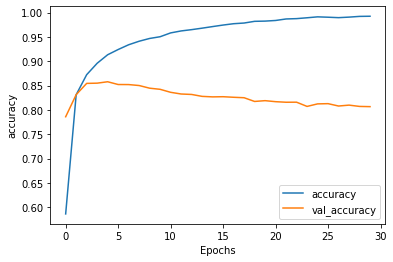

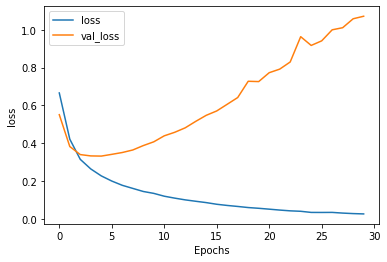

In [ ]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [ ]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

[[5.3103111e-05]
 [1.4162402e-05]]


The value is near to 0 which suggest non-sarcastic headlines.